# EDA Latam Challenge!

![Alt text](../docs/png-transparent-orlando-international-airport-latam-airlines-group-latam-chile-latam-brasil-logo-snapchat-purple-blue-violet.png)

- Author: Alan Matys
- Linkedin: https://www.linkedin.com/in/alanmatys/

In [2]:
# Import necesary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [3]:
# We define the module path in order to be able to call the .py functions in the module
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
# We iimport the functions to read the csv file (read_df), add the synthetic_features (synthetic_features), and the geo data(geo_data)
# To see the functions look for the make_data/input_data.py
from make_data.input_data import read_df, synthetic_features, geo_data

In [5]:
# We read the csv file
df = read_df()
df.head()

There is/are NaN in these Rows
 Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool
The row that has the NaN is:
                  Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O  \
6068 2017-01-19 11:00:00   200  SCEL  SPJC   LAW 2017-01-19 11:03:00   NaN   

     Ori-O Des-O Emp-O  DIA  MES   AÑO  DIANOM TIPOVUELO  \
6068  SCEL  SPJC   56R   19    1  2017  Jueves         I   

                     OPERA  SIGLAORI SIGLADES  
6068  Latin American Wings  Santiago     Lima  

There are no duplicate rows


Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    Miami  
2  Santiago    Miami  
3  Santiago    Miami  
4  Santiago    Miami

In this case it's just one row on the flight number, so we will skip it for the time being

# 2) Synthetic Features

We add the requested features with their specific criteria:
1) high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.

2) min_diff : difference in minutes between Date-O and Date-I .

3) delay_15 : 1 if min_diff > 15, 0 if not.

4) period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based
onDate-I .

In [6]:
df = synthetic_features(df)
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES high_season min_diff  delay_15  period_day  
0    Miami           1      3.0         0       night  
1    Miami           1      9.0         0       night  
2    Miami           1      9.0         0       night  
3    Miami           1      3.0         0       night  
4    Miami           1     -2.0         0       night  

[5 rows x 22 columns]

## Extra Features

We will add some features from the dataset and exogenous sources.

- distance: geodesic distance between the origin and the destination, using geopy data
- country_des: country of destination

In [7]:
df = geo_data(df)
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...  min_diff  delay_15  period_day   Dest      Orig  \
0  KMIA   AAL  ...       3.0         0       night  Miami  Santiago   
1  KMIA   AAL  ...       9.0         0       night  Miami  Santiago   
2  KMIA   AAL  ...       9.0         0       night  Miami  Santiago   
3  KMIA   AAL  ...       3.0         0       night  Miami  Santiago   
4  KMIA   AAL  ...      -2.0         0       night  Miami  Santiago   

      distance    country_des  des_long    des_lat  holiday  
0  1801.048899  United States -80.19362  25.774173        1  
1  1801.048899  United States -80.19362  25.774173        1  
2  1801.048899  United States -80.19362  25.774173        0  
3  1801.048899  United States -80.19362  25.774173        0  
4  1801.048899  United States -80.19362  25.774173        0  

[5 rows x 29 columns]

## 1) EDA (Exploratory Data Analysis)

In this section we try to describe the categorical and the numerical variables

### Categorical Features

In [8]:
def programed_vs_operated(df:pd.DataFrame):
    """

    Plot the comparision of the Programed features vs the Operated features

    Parameters
    --------------------

    - df: pandas.DataFrame
        Pandas DataFrame containing the this columns:
        - Origin Variables (Ori-I/Ori-O)
        - Destination Variables (Des-I/Des-O)
    
    """
    fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,12))

    fig.suptitle('Programmed vs Operation')

    sns.countplot(x=df["Ori-I"],
                order = df['Ori-I'].value_counts().index,
                ax=axes[0,0],
                color='red',
                alpha=0.7)

    sns.countplot(x=df["Ori-O"],
                order = df['Ori-O'].value_counts().index,
                ax=axes[0,1],
                color='blue',
                alpha=0.7)

    sns.countplot(x=df["Des-I"],
                order = df['Des-I'].value_counts().index,
                ax=axes[1,0],
                color='red',
                alpha=0.7)
    axes[1,0].tick_params(axis='x', rotation=90)

    sns.countplot(x=df["Des-O"],
                order = df['Des-O'].value_counts().index,
                ax=axes[1,1],
                color='blue',
                alpha=0.7)
    axes[1,1].tick_params(axis='x', rotation=90)

    dis_des = round((len(df[df['Des-I'] != df['Des-O']])/len(df)) * 100,2)

    axes[1,1].text(.4, .70,
                    f'{dis_des}% of the flights that ended on a different destination',
                    ha='left',
                    va='top',
                    color='blue',
                    transform=axes[1,1].transAxes)

    sns.countplot(x=df["Emp-I"],
                order = df['Emp-I'].value_counts().index,
                ax=axes[2,0],
                color='red',
                alpha=0.7)
    axes[2,0].tick_params(axis='x', rotation=90)

    sns.countplot(x=df["Emp-O"],
                order = df['Emp-O'].value_counts().index,
                ax=axes[2,1],
                color='blue',
                alpha=0.7)
    axes[2,1].tick_params(axis='x', rotation=90)

    dis_emp = round((len(df[df['Emp-I'] != df['Emp-O']])/len(df)) * 100,2)

    axes[2,1].text(.4, .70,
                    f'{dis_emp}% of the flights that have a diifferent Airline Code',
                    ha='left',
                    va='top',
                    color='blue',
                    transform=axes[2,1].transAxes)

    plt.show()

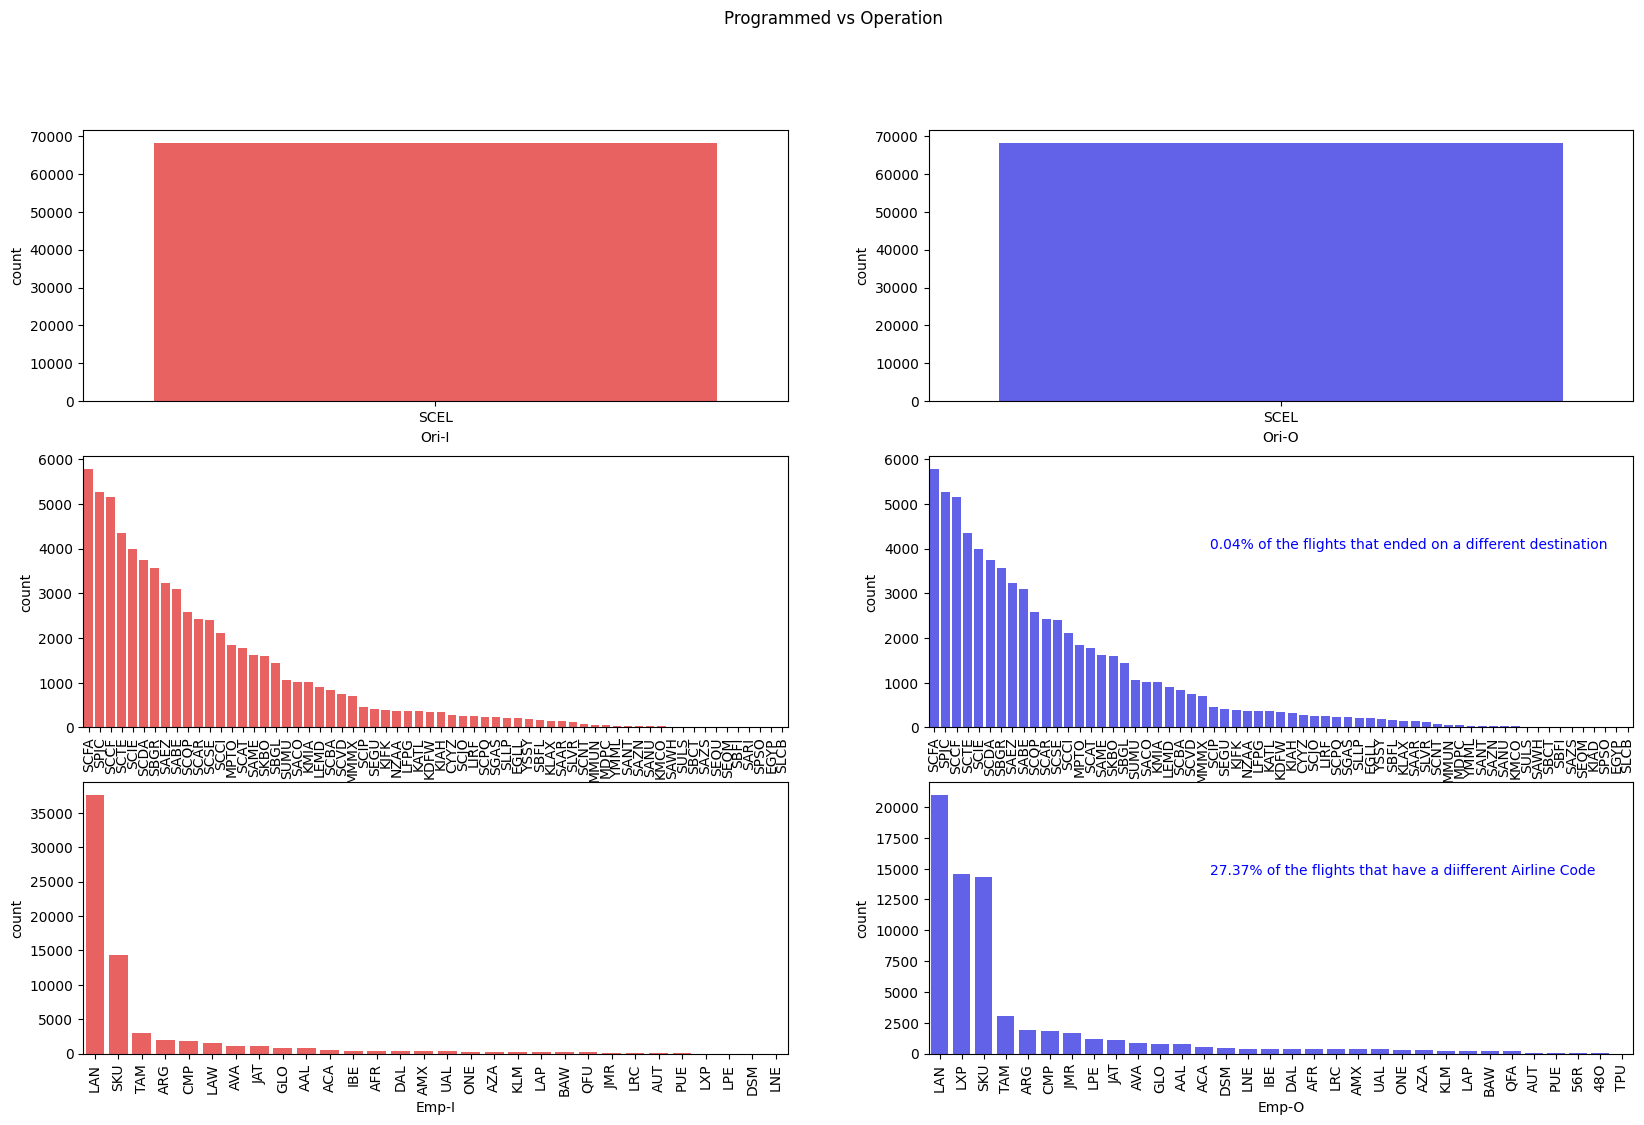

In [8]:
programed_vs_operated(df)

From this chart we can take the following insights
- More than 1/4 flights had a different airline code from the one that was programed.
- There are some flights, not usually, that ended on a different destination, based on the destination code

In [9]:
def other_categorical(df):
    """

    Plot other categorical Variables of the LATAM Dataframe

    Parameters
    --------------------
    df: pandas.Dataframe
        Latam Dataframe containing the 'TIPOVUELO', 'DIANOM', 'SIGLADES', 'OPERA' columns

    Returns
    -------------------
    None
    
    """
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,10))

    sns.histplot(x=df["TIPOVUELO"],
                    multiple="dodge", 
                    stat = 'percent',
                    shrink = 0.8,
                    common_norm=False,
                    ax = axes[0,0])
    
    axes[0,0].set_title('CHART 1')

    sns.histplot(x=df["DIANOM"],
                    multiple="dodge", 
                    stat = 'percent',
                    shrink = 0.8,
                    ax = axes[0,1],
                    discrete=True,
                    hue = df['TIPOVUELO'])

    axes[0,1].get_legend().remove()
    axes[0,1].set_title('CHART 2')

    sns.countplot(x=df['SIGLADES'],
                ax = axes[1,0],
                order = df['SIGLADES'].value_counts().index,
                hue= df['TIPOVUELO']
                )

    axes[1,0].tick_params(axis='x', rotation=90)
    axes[1,0].set(xlabel=None)
    axes[1,0].set_title('CHART 3')

    sns.histplot(x=df["OPERA"],
                    multiple="dodge", 
                    stat = 'percent',
                    shrink = 0.8,
                    ax = axes[1,1],
                    discrete=True,
                    hue = df['TIPOVUELO'])

    axes[1,1].tick_params(axis='x', rotation=90)
    axes[1,1].set(xlabel=None)
    axes[1,1].set_title('CHART 4')


    plt.show()

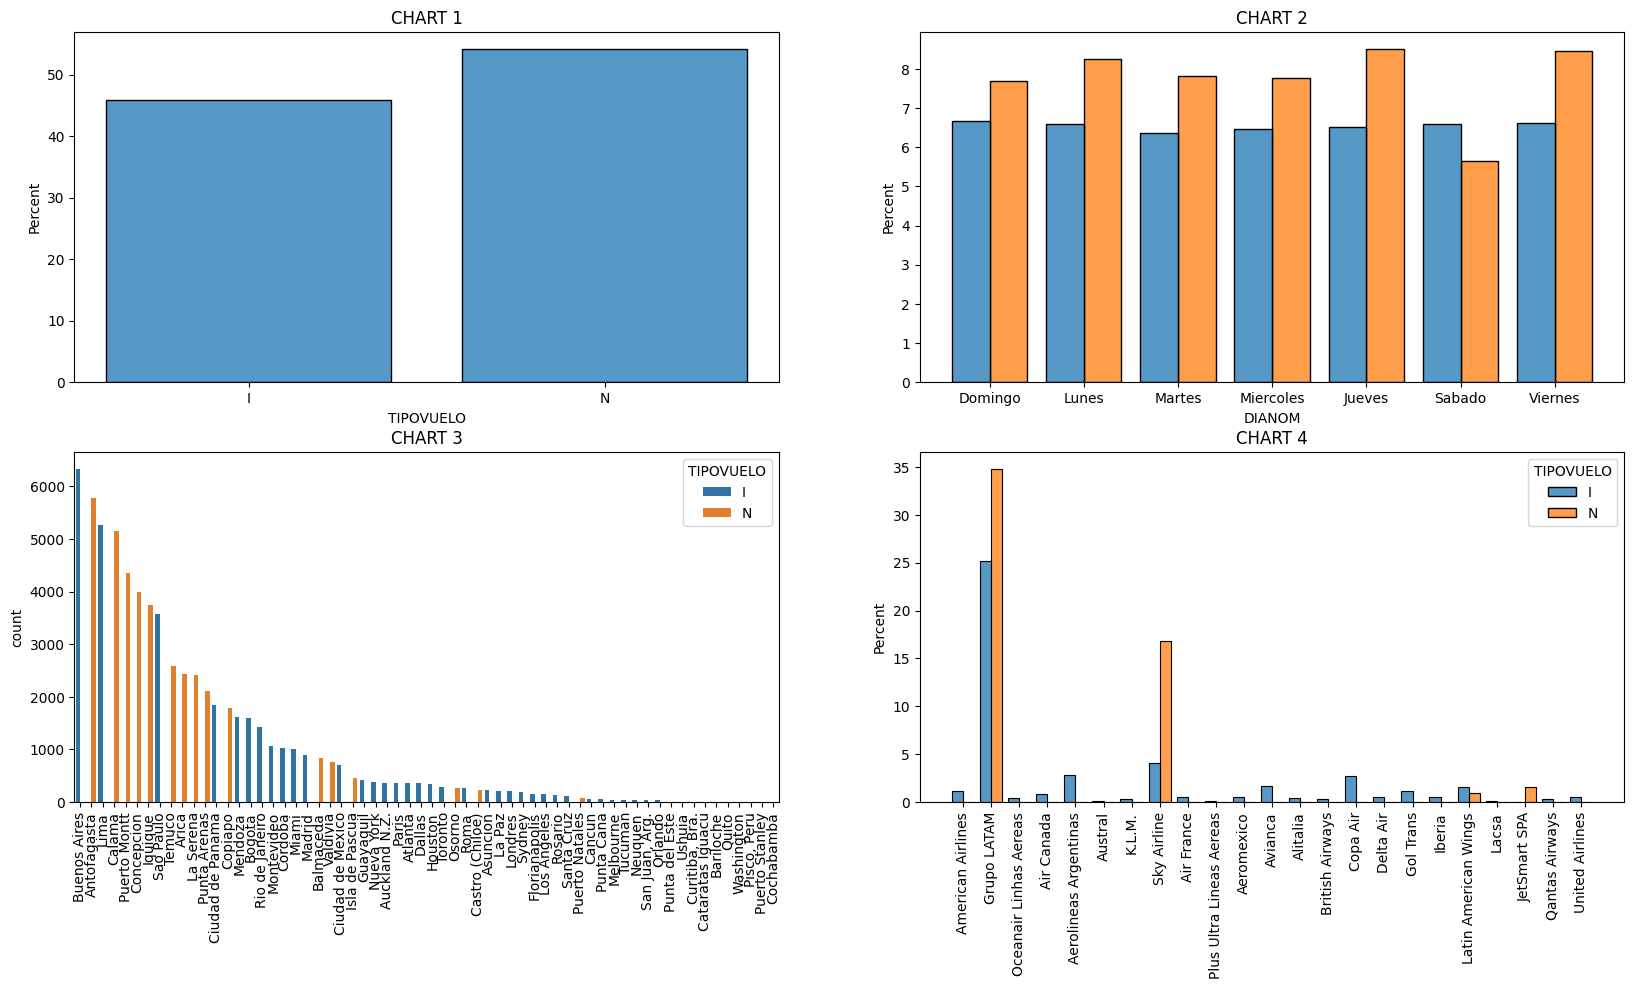

In [10]:
other_categorical(df)

From this chart we can take the following insights:
- FROM **Chart 1**:

There are more National Flights (within Chile) than International Flights (from SCL to another country), but more or less is equivalent.

- From **Chart 2**:

International flights are uniform in terms of the day of the flight, but for National flights it's not the same, there are significantly fewer flights on Saturdays and the proportion changes on this day (More Int flights)

- From **Chart 3**:

The top destination is Buenos Aires, the second place is for Antofagasta. On the top 10 flights most of them are national flights.

- From **Chart 4**:

Latam clearly dominates both National and International Flights in SCL. On second place we have Sky Airline with a significant market on National and some on International. With Latam & Sky we have ~ 80% of the flights

The others seem far from Top 2 players


### Consistency of results in time

We examine if the dominance from both airlines and destinations has persisted in time for the full year or from certain perioid and on they gained full dominance.

In [11]:
def time_s_airlines(df, var):
    """ 
    Plot the desired time series with count of flights per Day
    - CHART 1: General time series plot opened by var parameter
    - CHART 2: Same as chart 1 but excluding main players LATAM & Sky
    - CHART 3: Only National Destinations opened by var
    - CHART 4: Same as Chart 3 but for International destinations

    Parameters
    -------------------------------------------
    df: pandas.DataFrame()
        DataFrame containing the 'Fecha-I' and the var column

    var: str
        Variable of interest to use as hue in the time series

    """
    fig, ax = plt.subplots(nrows=4, figsize=(20, 28))

    plot = df.groupby([df["Fecha-I"].dt.date, df[var]]).agg(vuelos=("Vlo-I", "count"))

    sns.lineplot(plot, x="Fecha-I", y="vuelos", hue=var, ax=ax[0])

    ax[0].set_title("Flights per Day")
    ax[0].set(xlabel=None)

    sns.move_legend(
        ax[0], loc="center left", bbox_to_anchor=(1, 0.7), ncol=2, title=None
    )

    plot_2 = (
        df[~df.OPERA.isin(["Grupo LATAM", "Sky Airline"])]
        .groupby([df["Fecha-I"].dt.date, df[var]])
        .agg(vuelos=("Vlo-I", "count"))
    )

    sns.lineplot(plot_2, x="Fecha-I", y="vuelos", hue=var, ax=ax[1])

    sns.move_legend(
        ax[1], loc="center left", bbox_to_anchor=(1, 0.7), ncol=2, title=None
    )

    ax[1].set_title("Flights Excluding LATAM & Sky")
    ax[1].set(xlabel=None)

    df_nac = df[df["TIPOVUELO"] == "N"]

    plot_nac = df_nac.groupby([df_nac["Fecha-I"].dt.date, df[var]]).agg(
        vuelos=("Vlo-I", "count")
    )

    sns.lineplot(plot_nac, x="Fecha-I", y="vuelos", hue=var, ax=ax[2])

    sns.move_legend(
        ax[2],
        loc="center left",
        bbox_to_anchor=(1, 0.9),
        ncol=2,
        title=None,
        fancybox=True,
        shadow=True,
    )

    ax[2].set_title("Nac Flights")
    ax[2].set(xlabel=None)

    df_int = df[df["TIPOVUELO"] == "I"]

    plot_int = df_int.groupby([df_int["Fecha-I"].dt.date, df[var]]).agg(
        vuelos=("Vlo-I", "count")
    )

    sns.lineplot(plot_int, x="Fecha-I", y="vuelos", hue=var)

    ax[3].set_title("Int Flights")
    ax[3].set(xlabel=None)

    sns.move_legend(
        ax[3], loc="center left", bbox_to_anchor=(1, 0.7), ncol=2, title=None
    )

    plt.show()

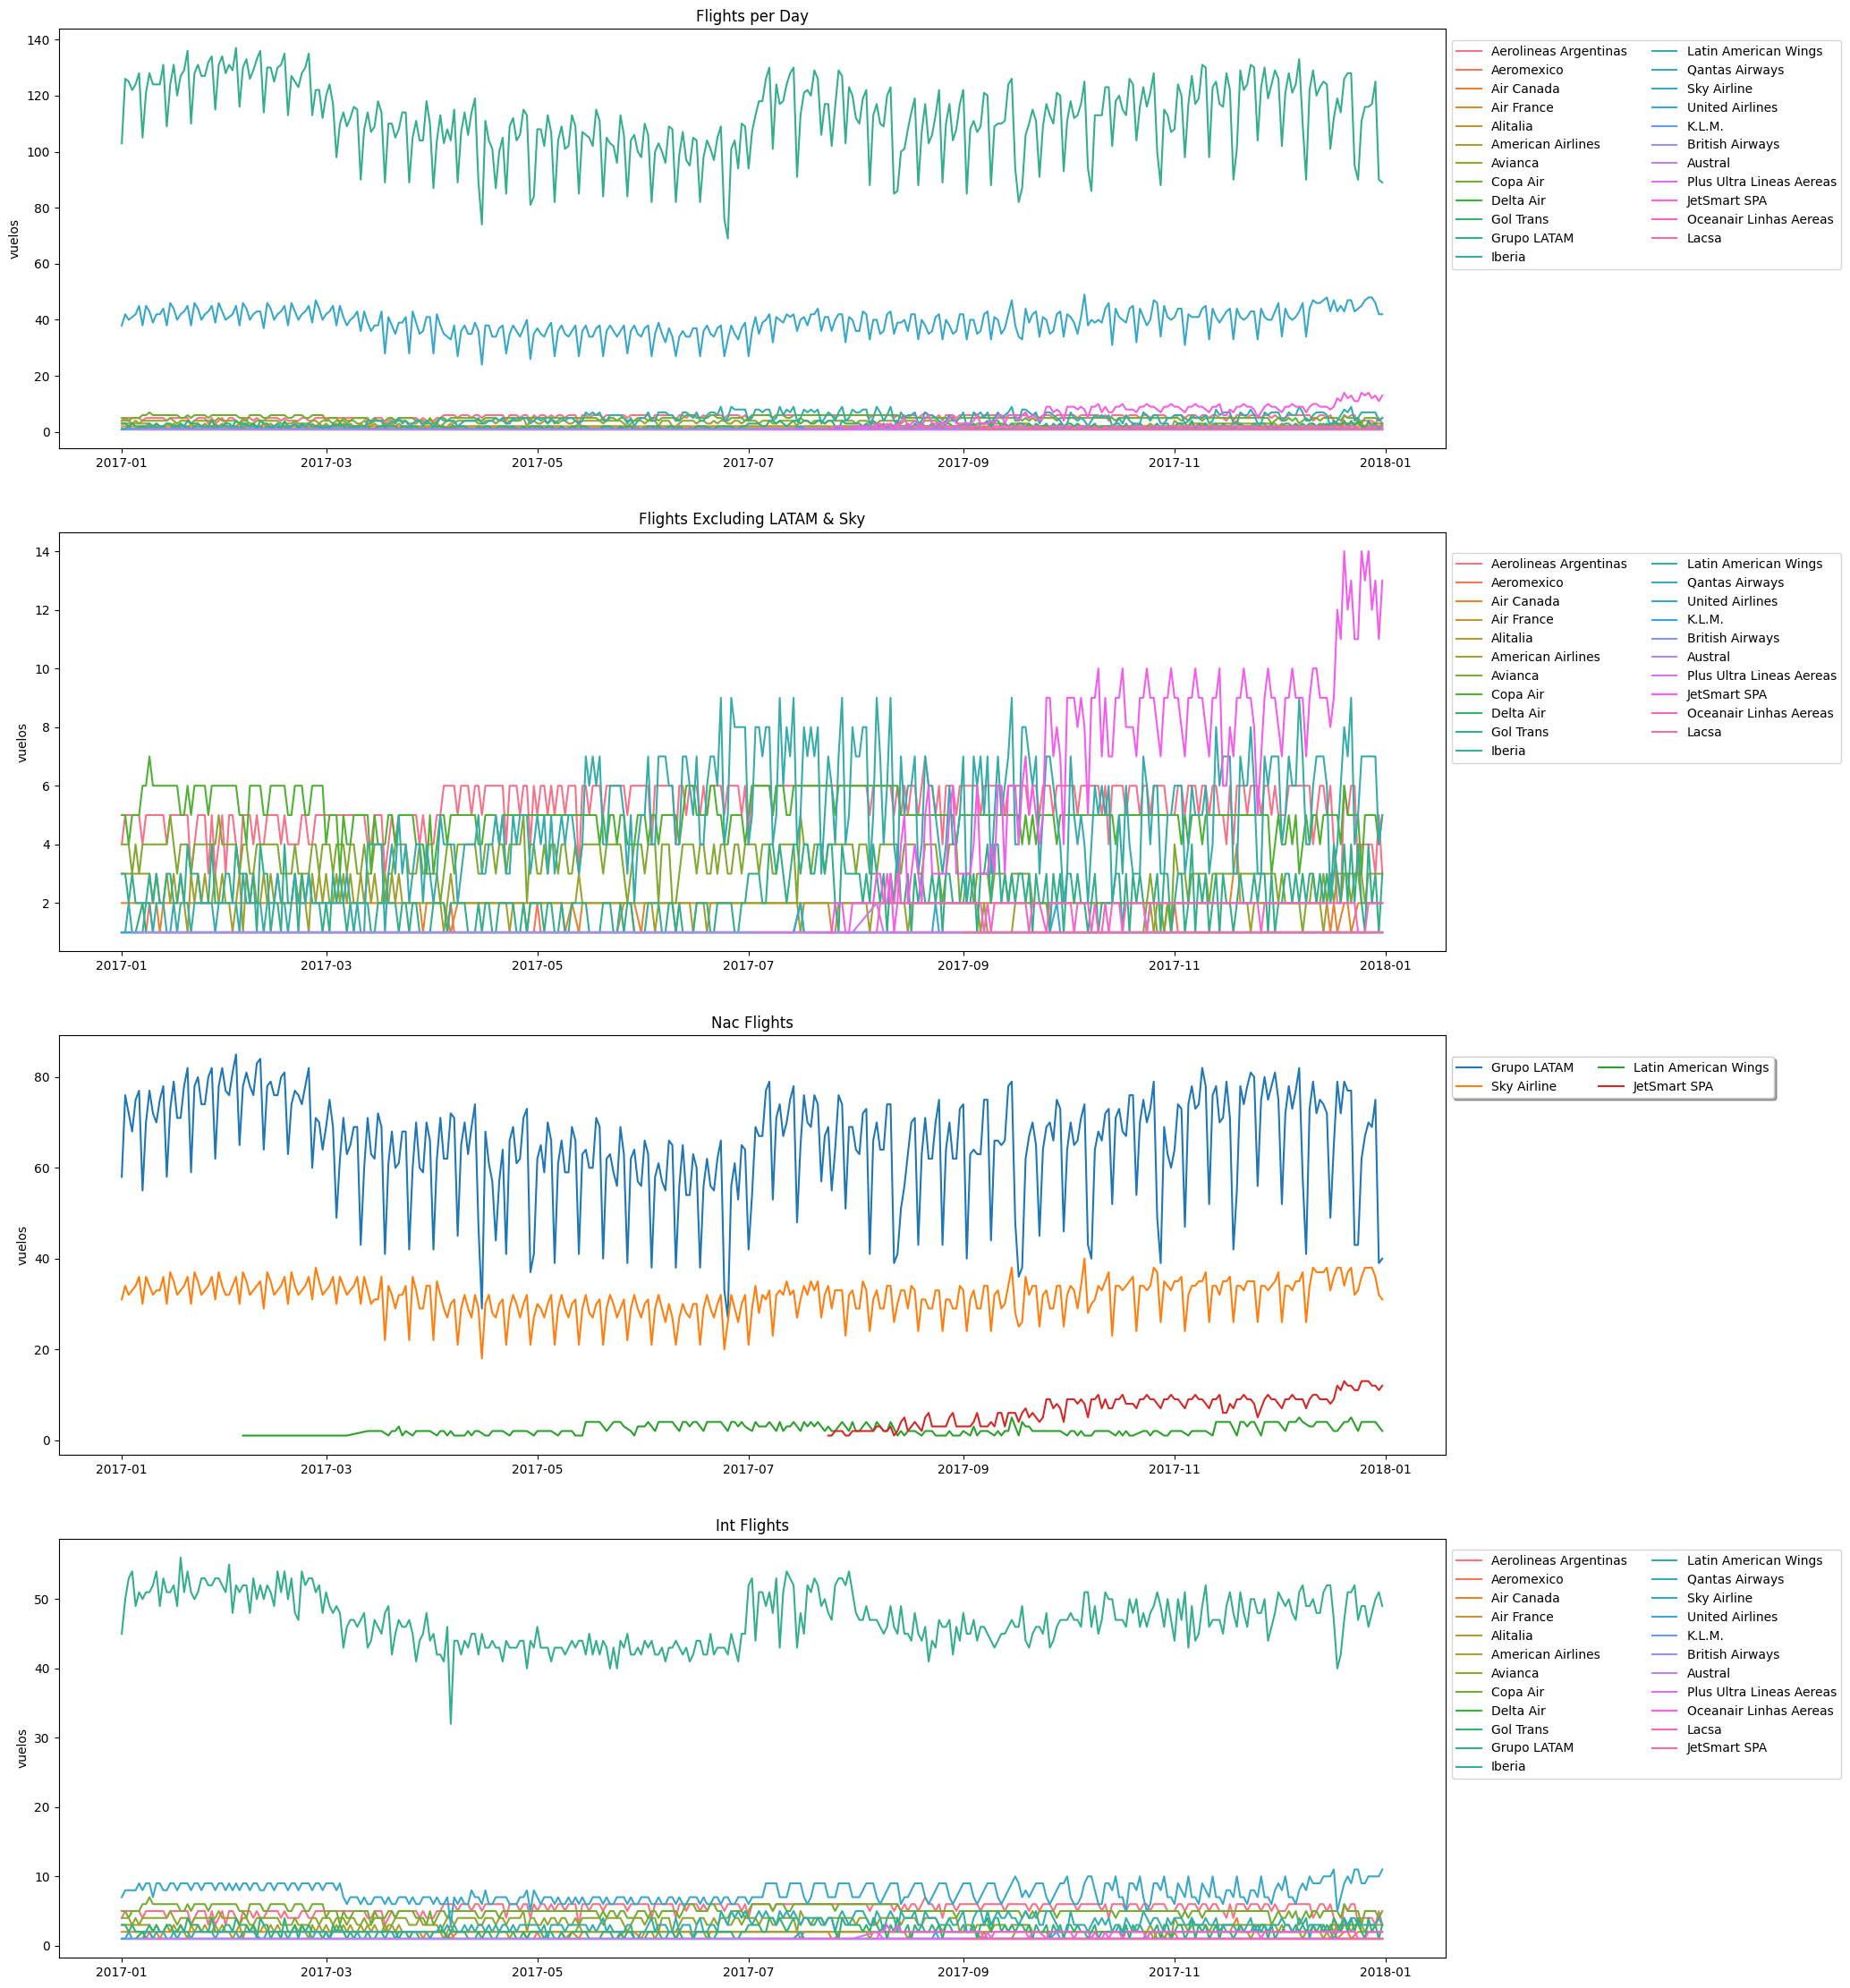

In [13]:
time_s_airlines(df,'OPERA')

From this chart we can extract the following insights:

- **Flights per day:** The dominance in this market from LATAM and Sky persists over time and does not differenciate in any specific period. It may have a 

- **Flighs Excluding LATAM & Sky:** There are significantly fewer flights from other airlines, most of them are not higher than 8 flights. JetSmart has surged since August significantly

- **Nac Flights:** The dominance of LATAM & Sky in the domestic market is persisted over the year, but there are not that amount of players.

- **Int Flights:** LATAM dominates also international market but Sky is not that differenciated from the other players.

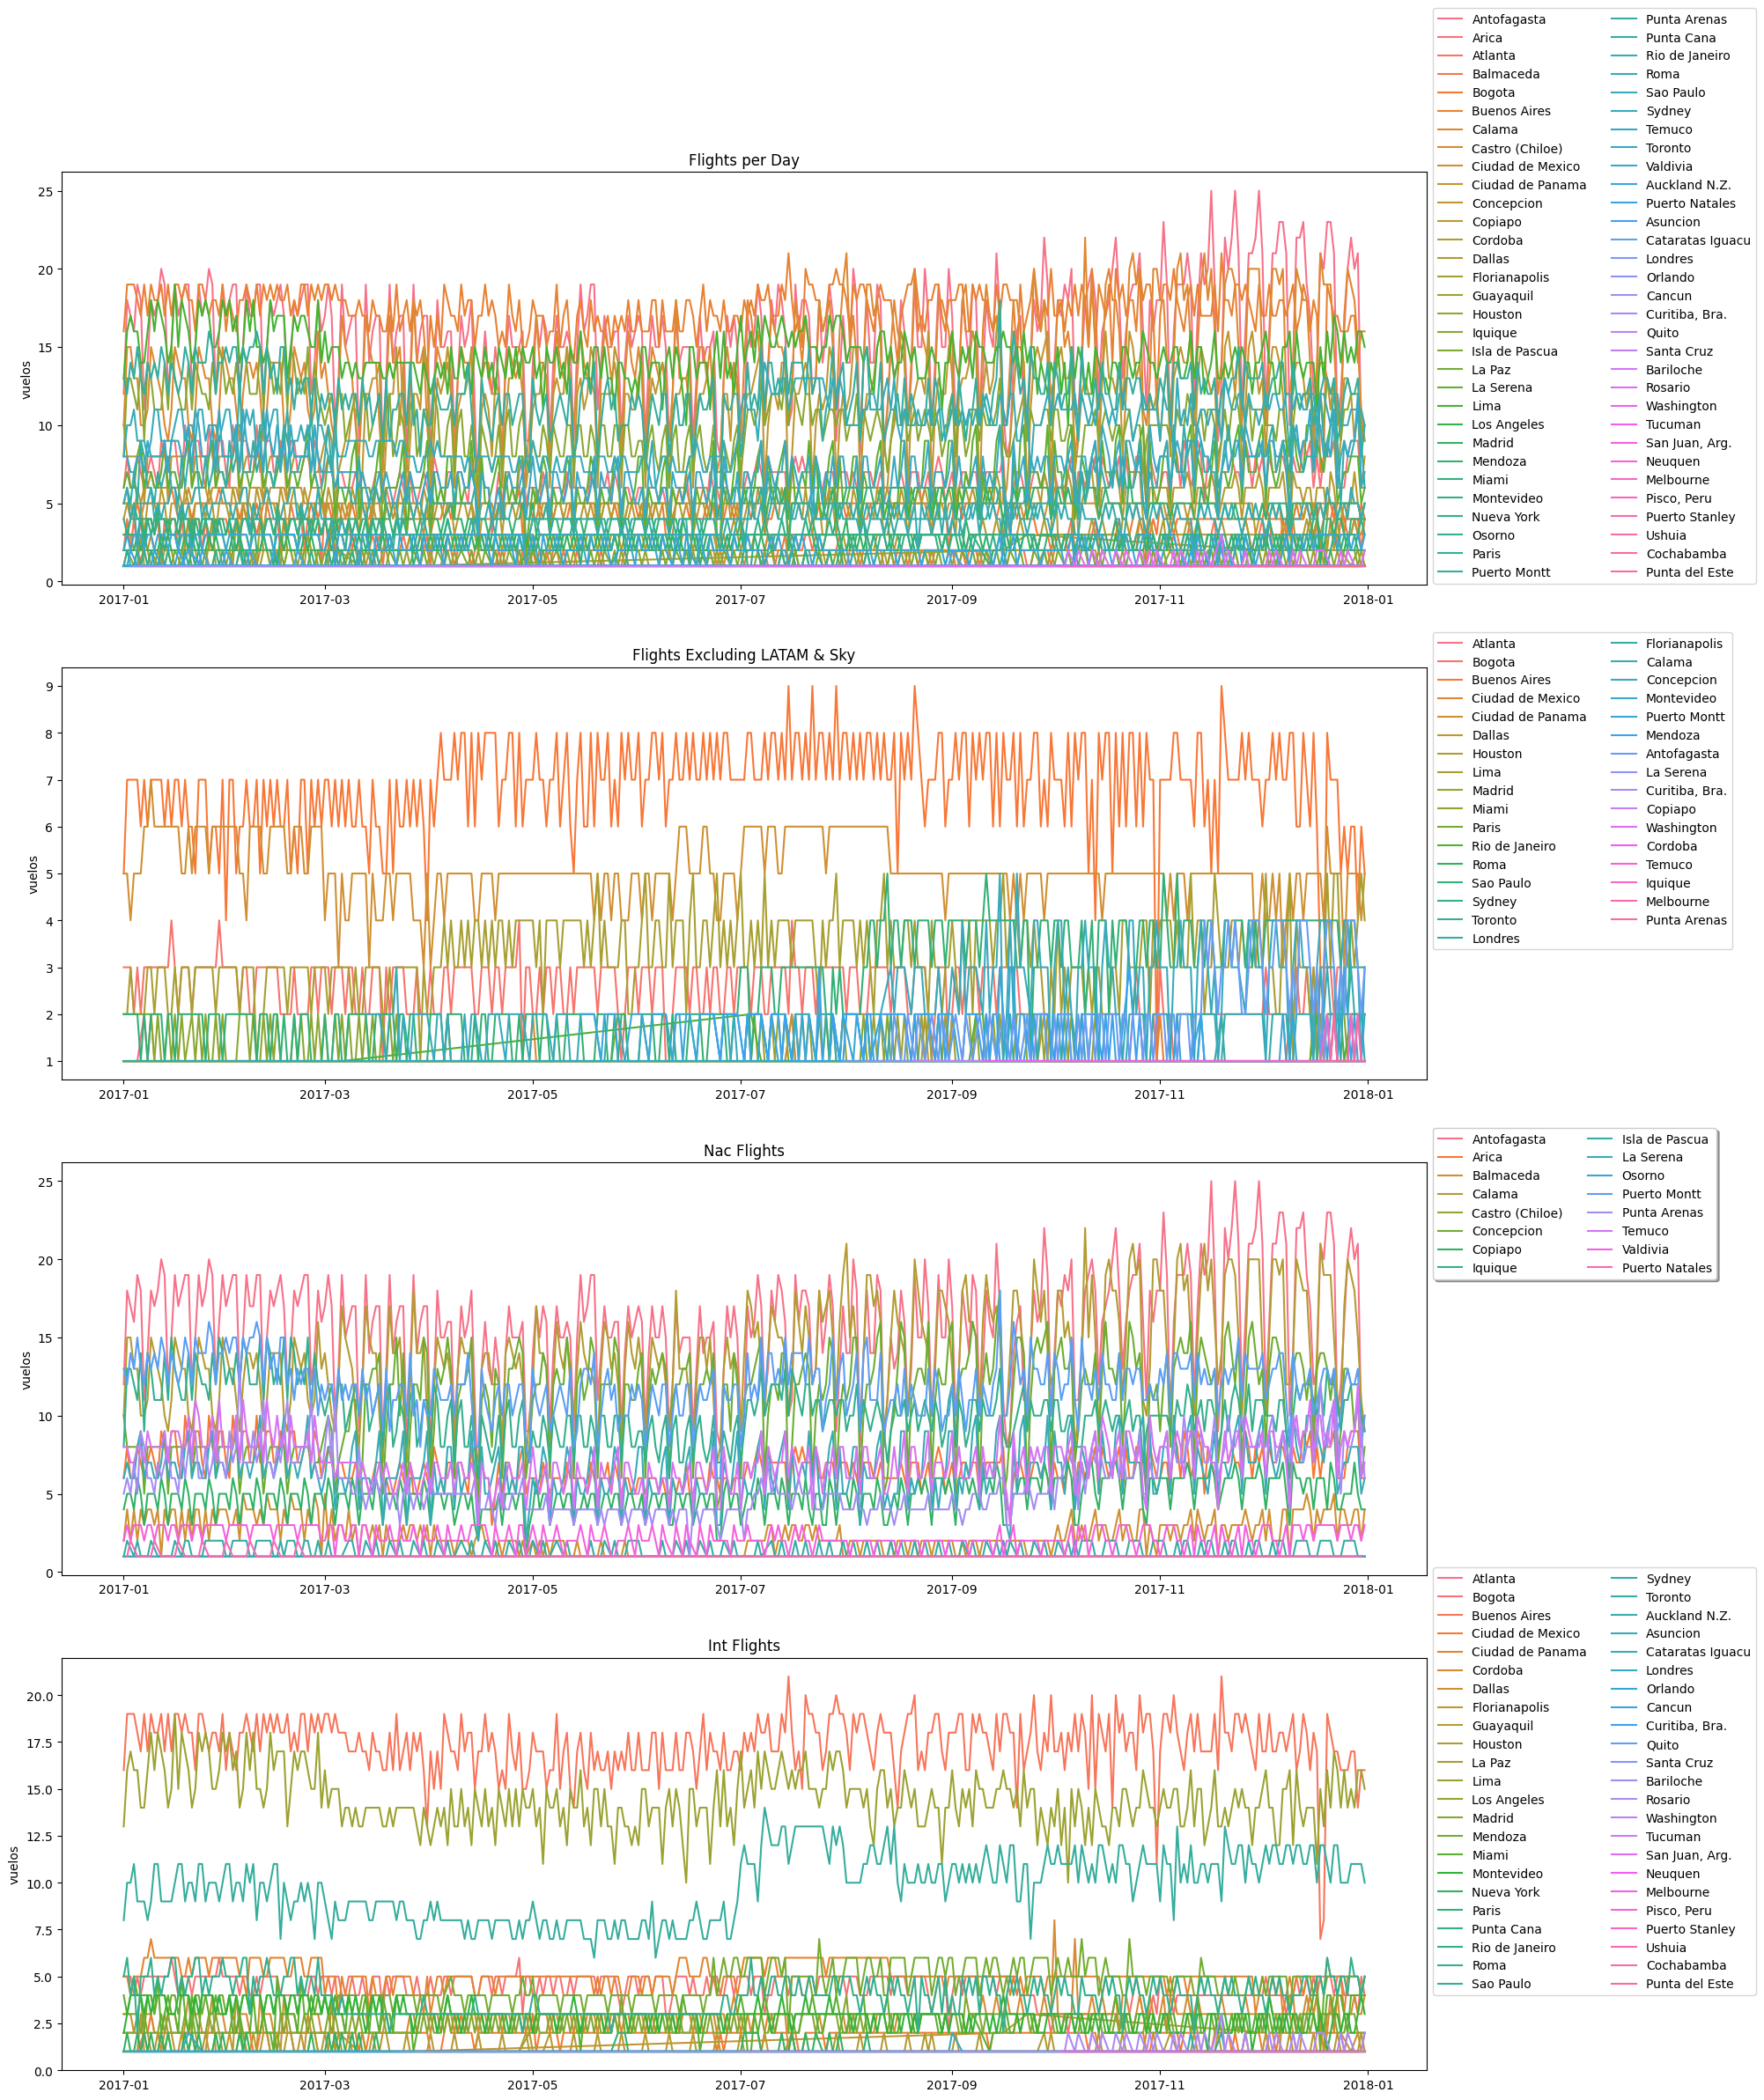

In [14]:
time_s_airlines(df, 'SIGLADES')

From this chart we can extract the following insights:

- **Flights per day:** There is no clear dominance from any destination, there are some destinations with lower flights but no clear winner.

- **Flighs Excluding LATAM & Sky:** Like we saw on the previous chart, excluding Latam & Sky leaves out a great amount of Nac Destinations. The amount of flights significantly decreaces

- **Nac Flights:** The destination *Antofagasta* is differenciated to the others at the start of the year. At the end the same with *Antofagasta* & *Calama*

- **Int Flights:** In terms of international market, *Buenos Aires*, *Lima* and *Sao Paulo* have a more significant share than the other destinations.

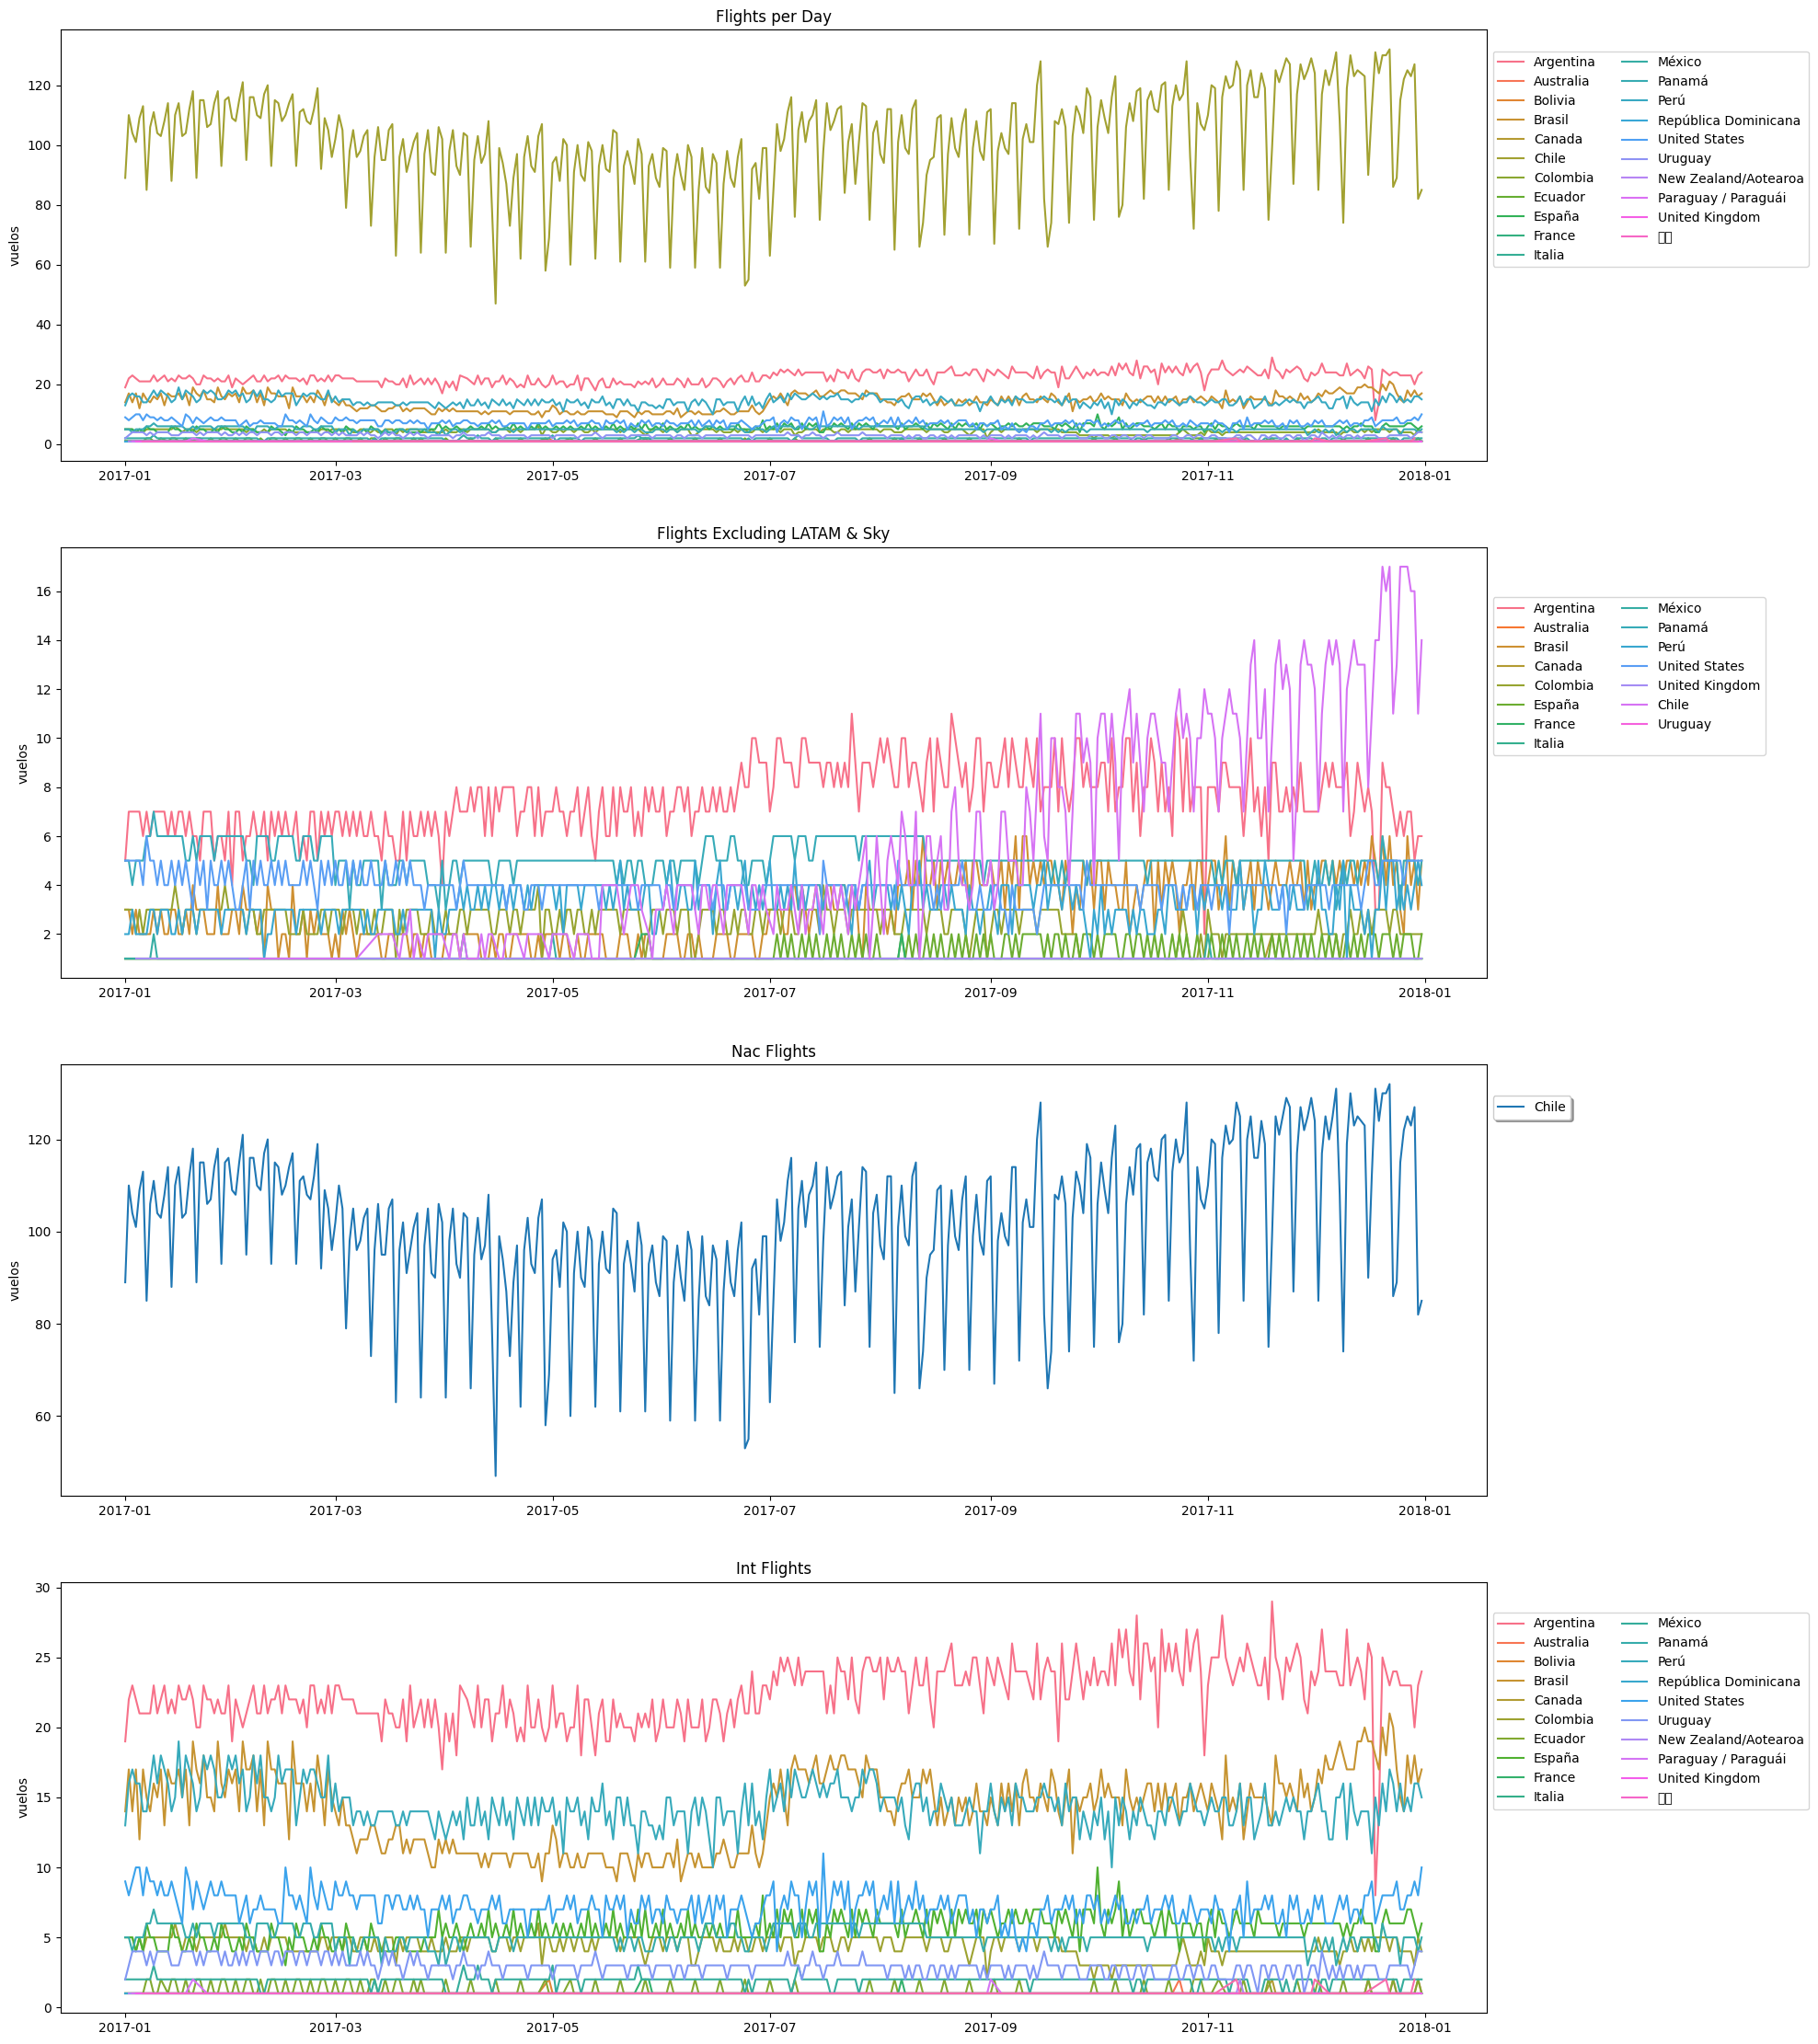

In [14]:
time_s_airlines(df, 'country_des')

Same as above Chart but, with the country aggregation generated on the geo_data function.

## Numerical Features

We try some plots on the Numerical Features

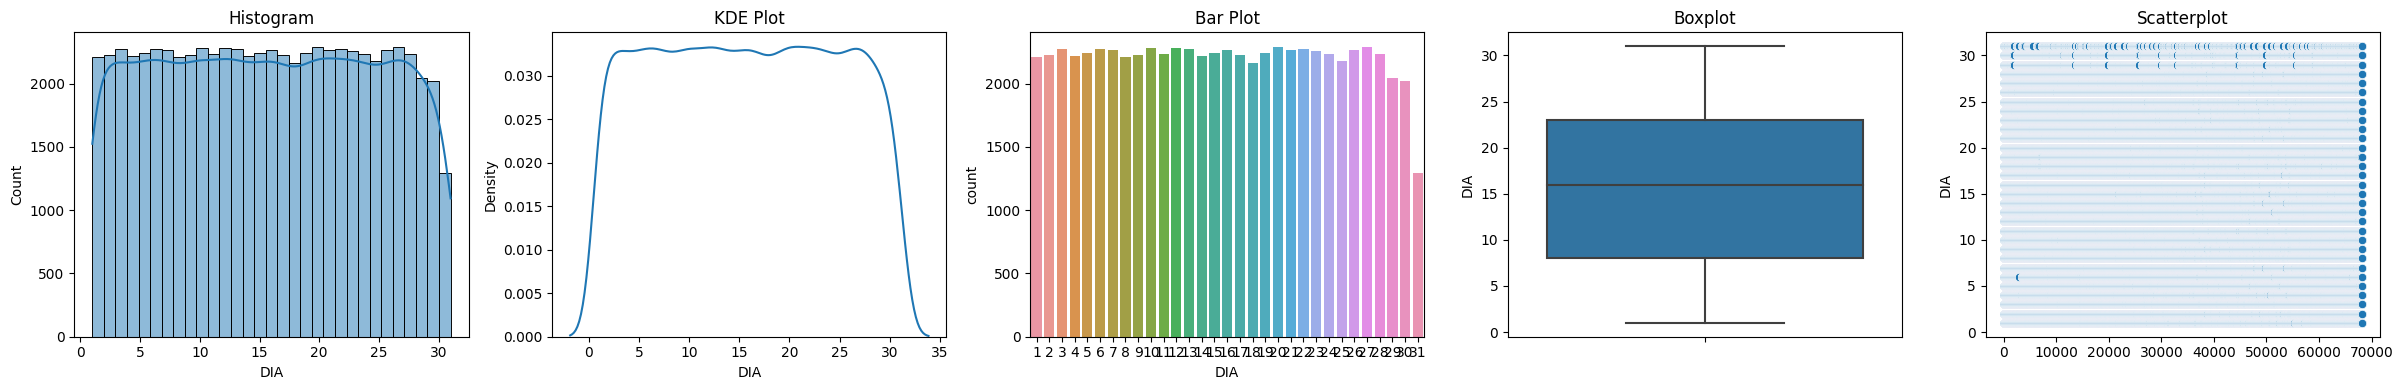

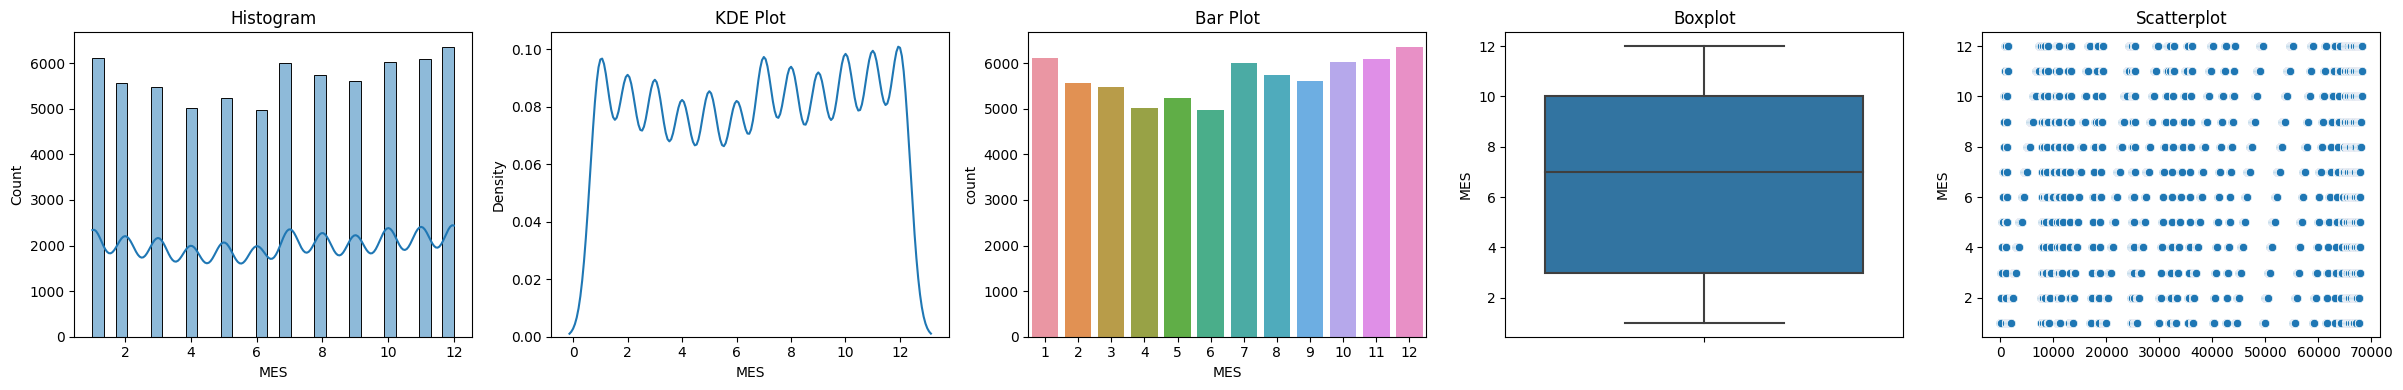

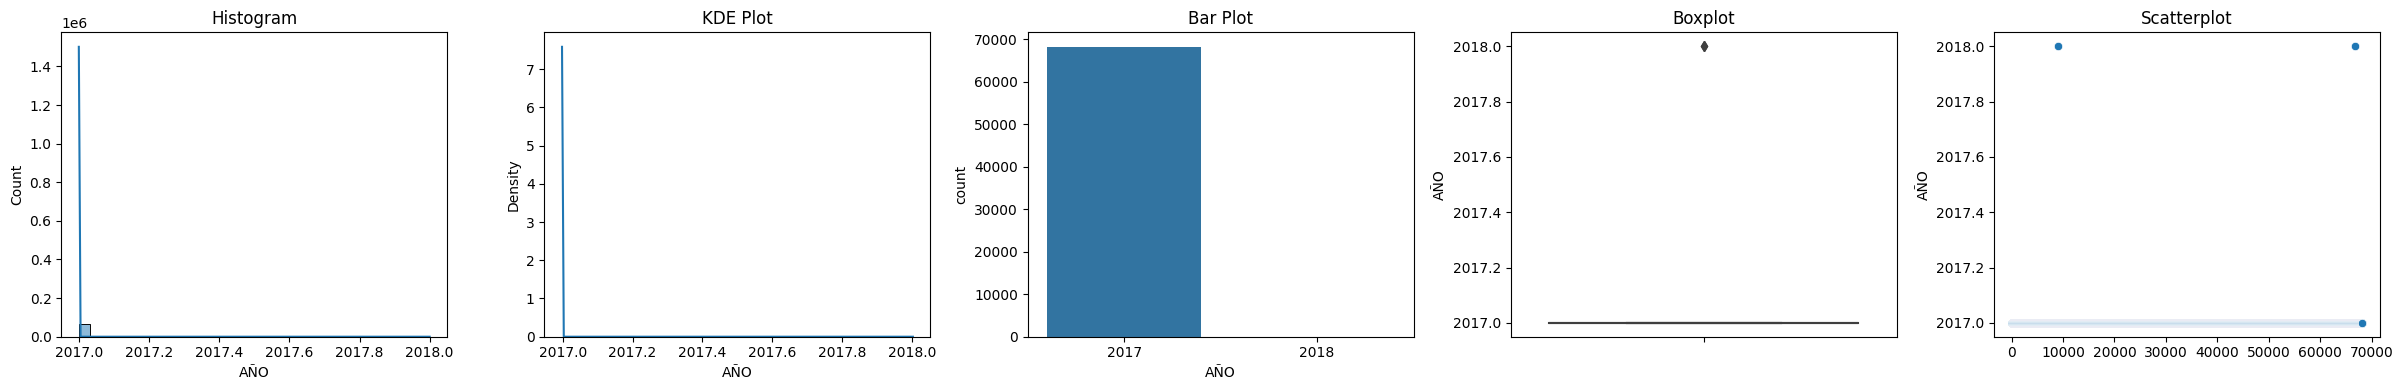

In [14]:
def plots(df, variable):
    if df[variable].dtype != object:
        # define figure size
        fig, ax = plt.subplots(1, 5, figsize=(24, 4))

        # histogram
        sns.histplot(df[variable], bins=31, kde=True, ax=ax[0])
        ax[0].set_title('Histogram')

        # KDE plot
        sns.kdeplot(df[variable], ax=ax[1])
        ax[1].set_title('KDE Plot')
        
        # bar plot
        sns.countplot(x=df[variable], ax=ax[2])
        ax[2].set_title('Bar Plot')

        # boxplot
        sns.boxplot(y=df[variable], ax=ax[3])
        ax[3].set_title('Boxplot')

        # scatterplot
        sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
        ax[4].set_title('Scatterplot')

        plt.tight_layout()
        plt.show()

for i in ['DIA', 'MES', 'AÑO', 'Vlo-O']:
    plots(df, i)

From this plots we can't say much, based on the original variables, flights between days & months are uniformly distributed.

There are some flights that started on 2018.

# 3) Examine the Behaviour


We add the insights generated by the previous analysis into specific columns and test if they help on the prediction of the delay

The consideration of the target variable is the following:

- $ Delay = mindiff > 0 $

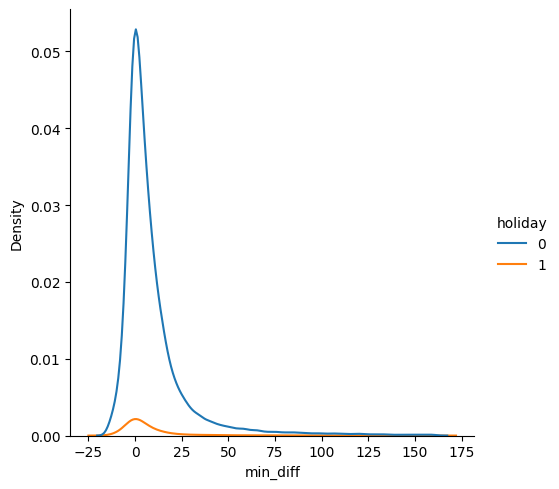

In [18]:
sns.displot(data=df, x='min_diff', hue='holiday',kind='kde')

In [9]:
def add_insights(df):
    """
    
    """

    df['delay'] = np.where(df['min_diff'] > 0, 1, 0)

    df['diff_code'] = np.where (df['Des-I'] != df['Des-O'], 1, 0)

    df['top_airline'] = np.where(df['OPERA'].isin(['Grupo LATAM','Sky Airline']),1,0)

    df['top3_destination_int'] = np.where(df['country_des'].isin(['Perú','Brasil','Argentina']),1,0)


    return df

In [10]:
df = add_insights(df)

In [29]:
def corr_plot(df):
    """
    
    """
    fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(30,24))
    sns.heatmap(df.pivot_table(index = "DIA",
                               columns = "OPERA", 
                               aggfunc = {"delay_15": np.mean}), 
                               annot=True, 
                               cmap='coolwarm', 
                               ax=axes[0,0])

    sns.heatmap(df.pivot_table(index = "DIA", 
                               columns = "OPERA", 
                               aggfunc = {"delay": np.mean}), 
                               annot=True, cmap='coolwarm', 
                               ax=axes[0,1])

    sns.heatmap(df.pivot_table(index = "MES", 
                               columns = "OPERA", aggfunc = {"delay_15": np.mean}), annot=True, cmap='coolwarm', ax=axes[1,0])

    sns.heatmap(df.pivot_table(index = "MES", columns = "OPERA", aggfunc = {"delay": np.mean}), annot=True, cmap='coolwarm', ax=axes[1,1])

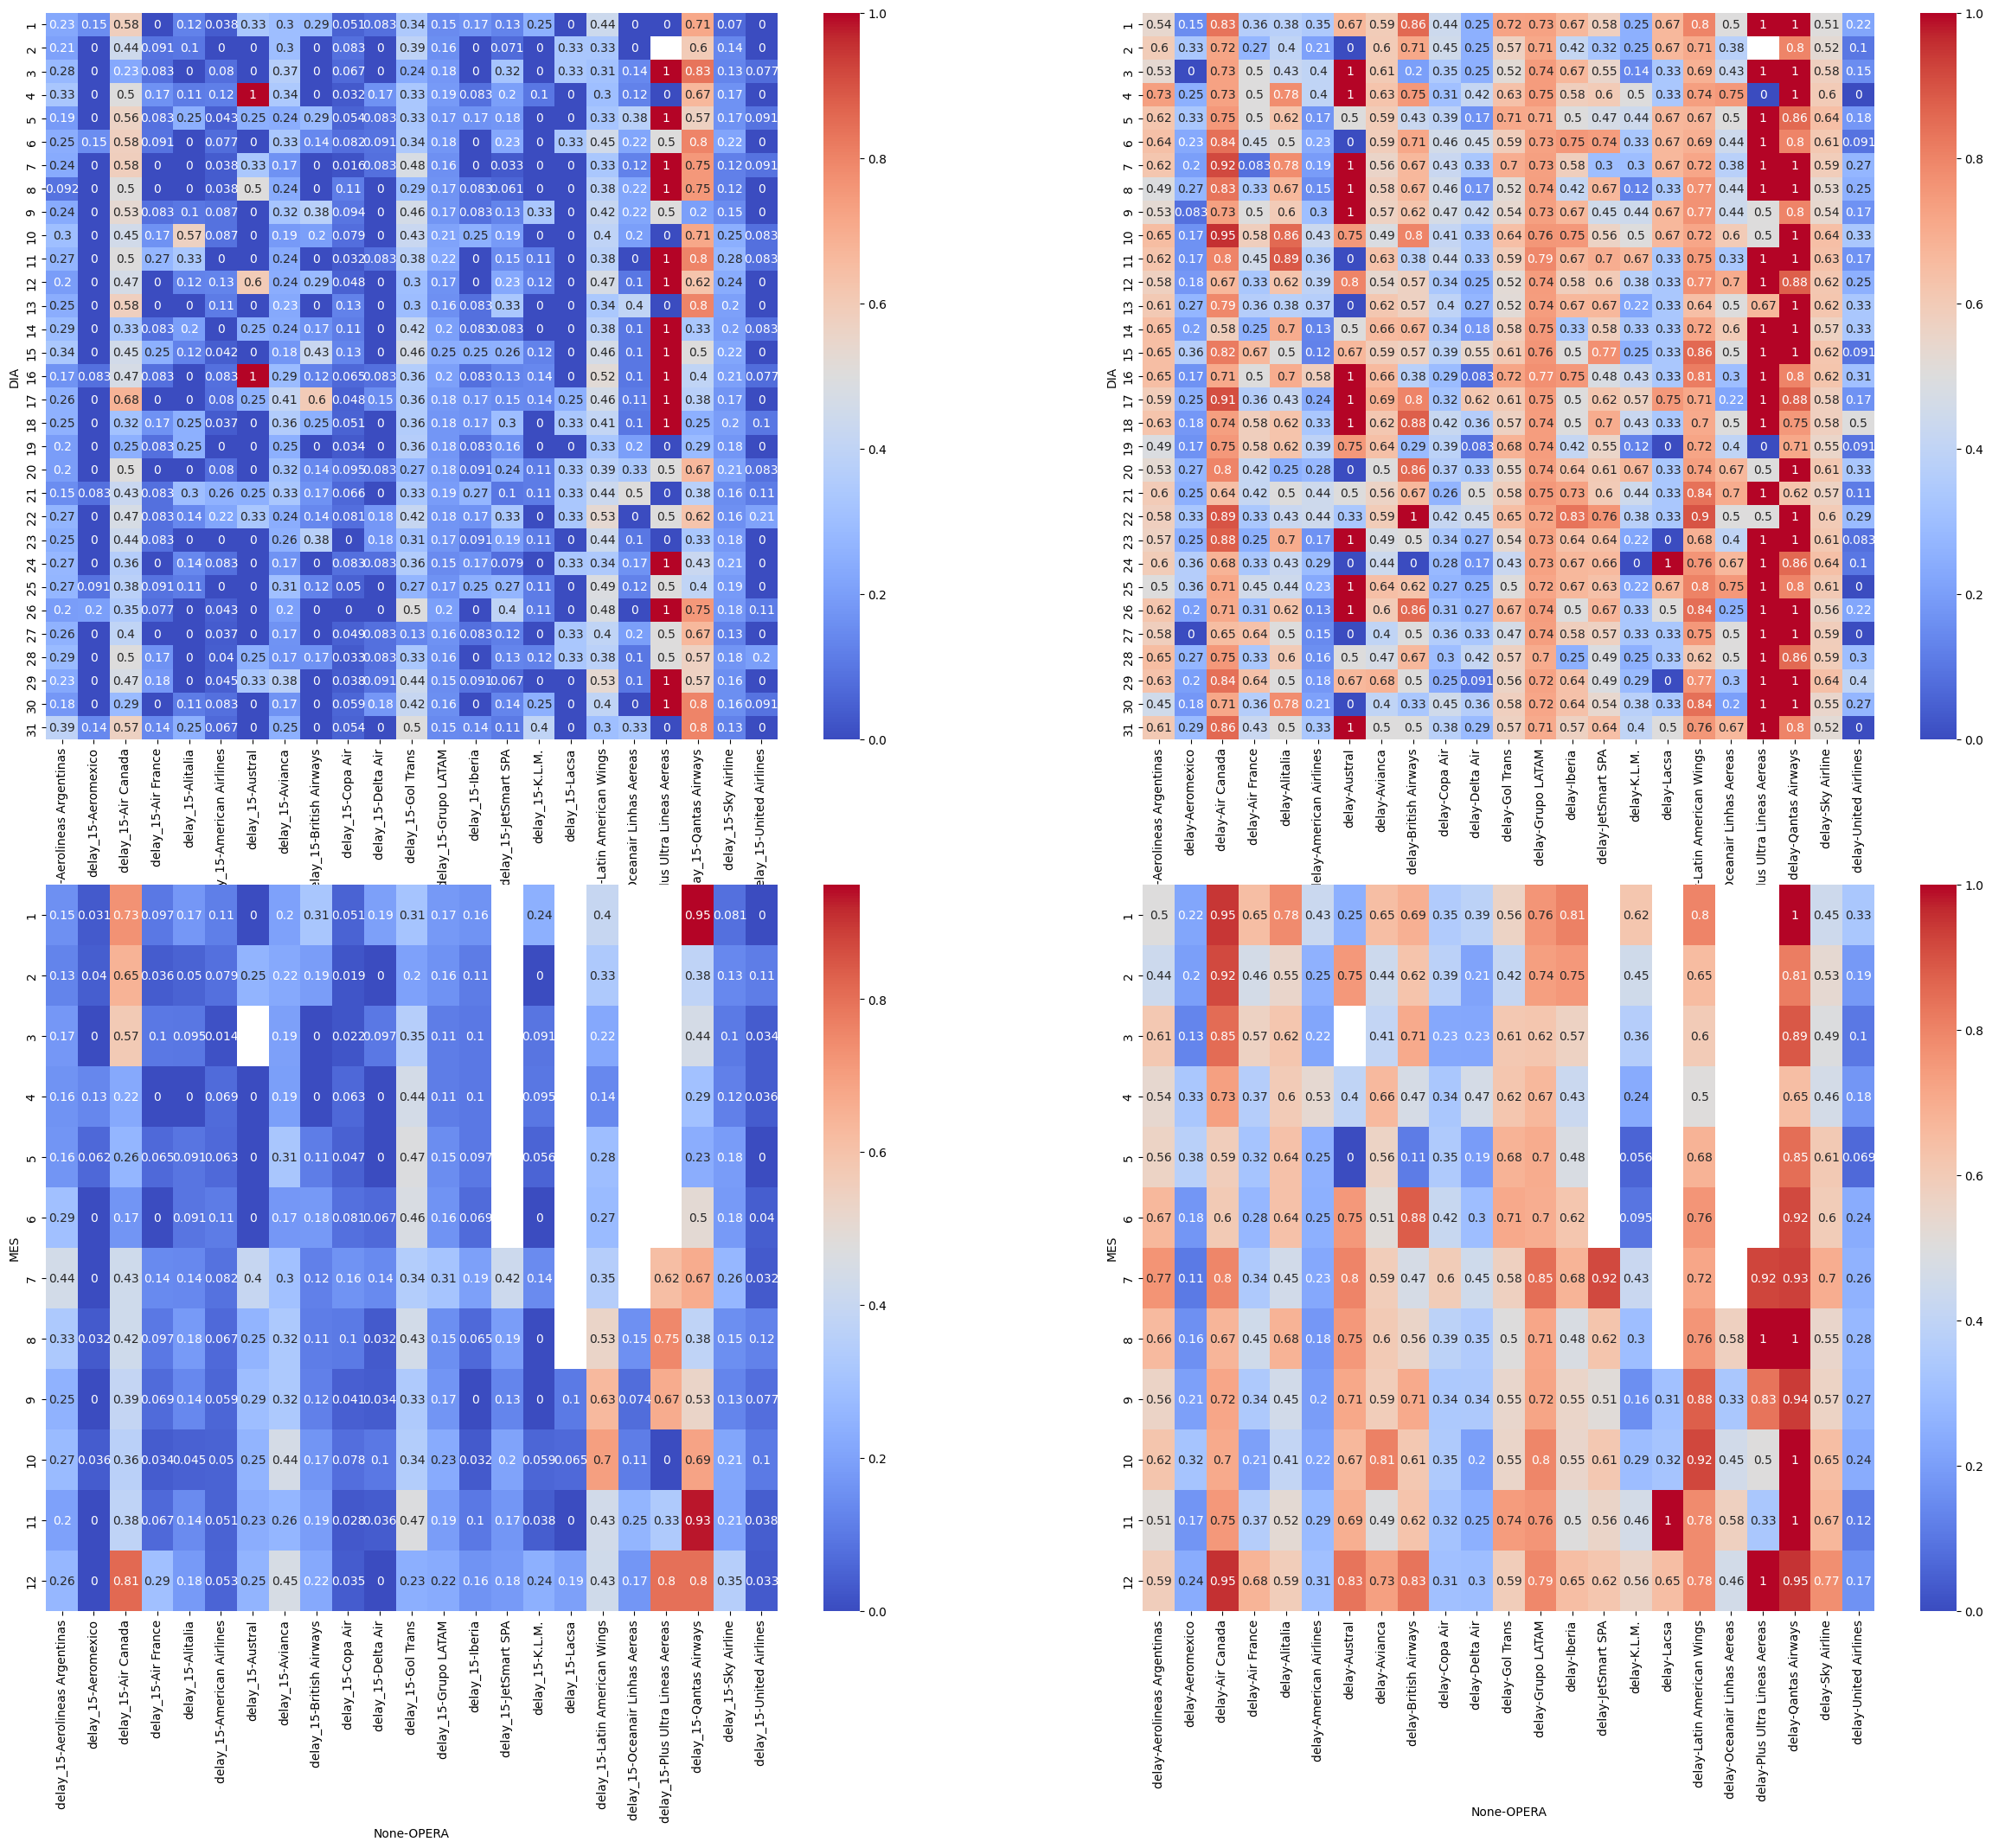

In [30]:
corr_plot(df)

From this Chart we can extract the following insights:

It's expected that Date variables will be one of the most important variables, these show clear thresholds in the target variable. 

Airlines seems preety important but, because the over the sub respresentation of flights compared to Latam & Sky, it won't weight that much

There are some insights to take from the plot above:

- **:** There are some Airlines like *Plus Ultra Linhas Aereas* or *Qantas Airways* that have delay almost every day, and some heavy delays (More than > 15 min) on some periods in the year. But Ultra only flown from July to December.

- **:** *Austral* also has delay on some days but they were not heavy delays (More than > 15 min)

- **:** *AirCanada* also has delay on some days but they were not heavy delays Most of them were originated from January to March and in December

<Axes: >

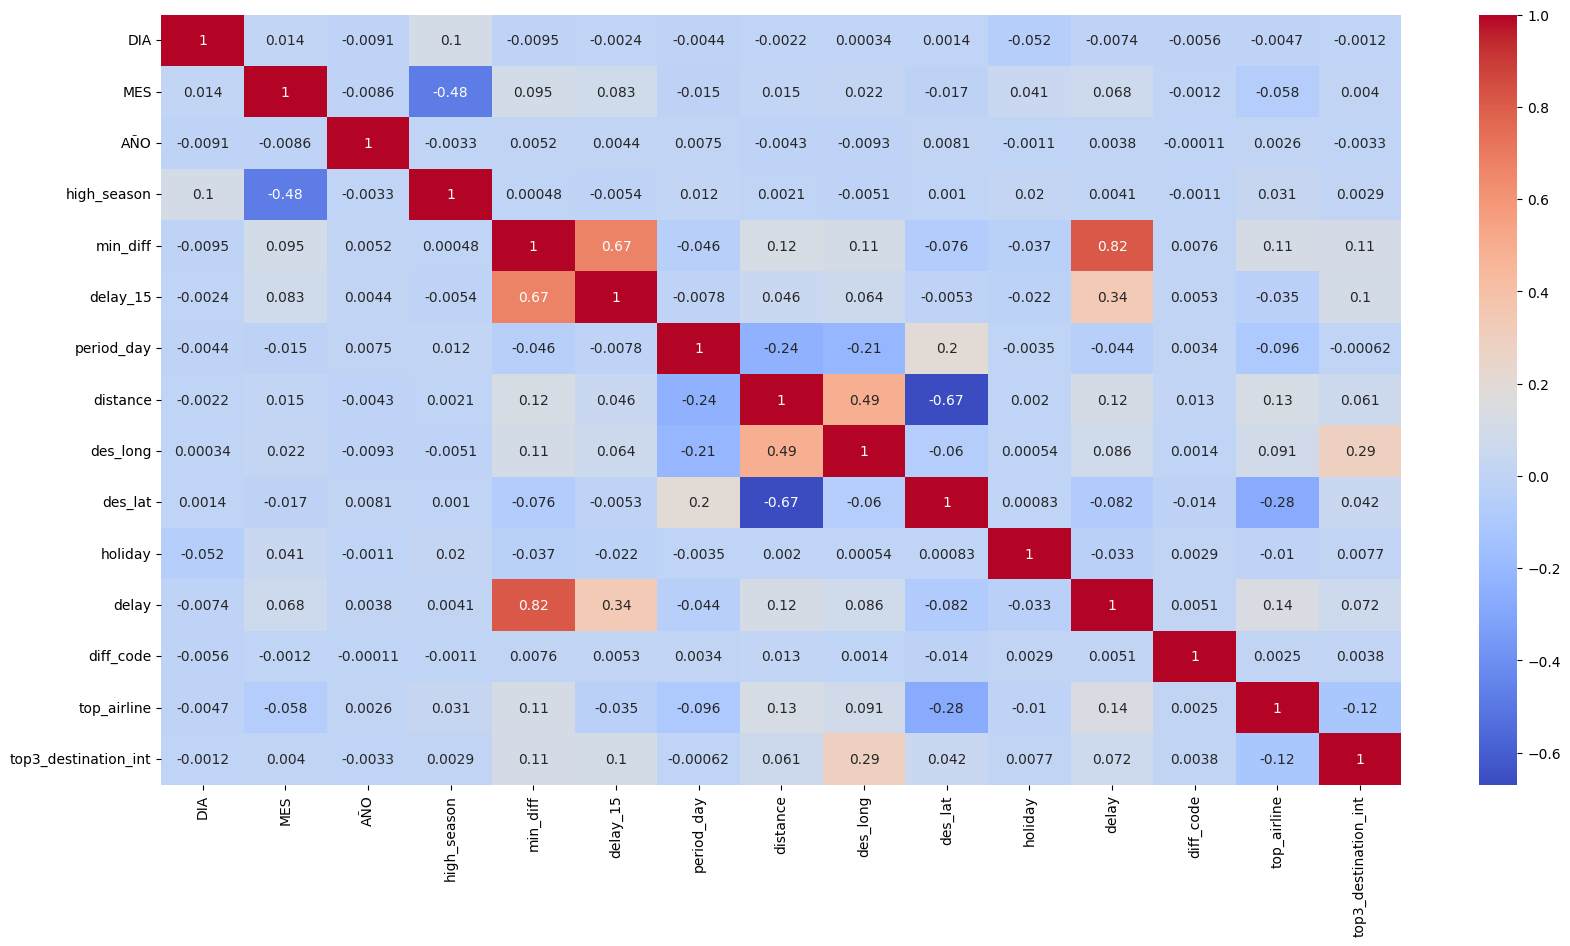

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method = 'spearman'), annot=True, cmap='coolwarm')

# 4) Train the models

**Strategy**: 
- We will first encode the dataframe, using one hot encoding for the categorical non-ordinal variables, and label encoder for the categorical ordinal variables.

- Then we will split into *train* and *test* datasets (25% of the dataframe to test)

- After that we test for various base models in order to see which strategy fits the most to our problem
    - We evaluate each model using cross valiation
    - We test the models from the grid using mean accuracy & deviation accuracy (for the folds)



- Finially we optimize a pipeline for the final model, scale variables and finetune the hyperparameters for the best model.

- Evaluation of results on a series of clasification metrics.

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def encode_data(df, one_hot_cols, label_cols):
    """
    Applies one-hot encoding to specified columns in a pandas DataFrame,
    and label encoding to specified columns in the same DataFrame.
    
    Parameters:
    ---------------------------
    df: pandas.DataFrame
      The DataFrame to encode.
      
    one_hot_cols: list
      A list of column names to one-hot encode.
      
    label_cols: list
      A list of column names to label encode.
    
    Returns:
    ---------------------------

    encoded_df: pandas.DataFrame
      The encoded DataFrame.

    """
    # One-hot encode specified columns
    one_hot_encoder = OneHotEncoder()
    one_hot_data = one_hot_encoder.fit_transform(df[one_hot_cols])
    one_hot_df = pd.DataFrame(one_hot_data.toarray())
    one_hot_df.columns = one_hot_encoder.get_feature_names_out(one_hot_cols)
    
    # Label encoder specified columns
    label_encoder = LabelEncoder()
    for col in label_cols:
        df[col] = label_encoder.fit_transform(df[col])
    
    # Concatenate the one-hot encoded and label encoded DataFrames
    encoded_df = pd.concat([df.drop(columns=one_hot_cols), one_hot_df], axis=1)
    
    return encoded_df

In [12]:
encoded_df = encode_data(df, one_hot_cols=['OPERA','DIANOM','SIGLADES','country_des','Emp-I','Emp-O','TIPOVUELO'],label_cols=['period_day']).drop(columns=['Fecha-I','Ori-I', 'Des-I','Fecha-O','Ori-O','Des-O','Orig','Dest','Vlo-I','Vlo-O','SIGLAORI'])
encoded_df['des_long'] = encoded_df['des_long'].astype('float64')
encoded_df['des_lat'] = encoded_df['des_lat'].astype('float64')

In [13]:
from sklearn.model_selection import train_test_split    


# Train / Test Separation
df_train, df_test = train_test_split(encoded_df, test_size = 0.25, random_state = 46)


X = df_train.loc[:,~encoded_df.columns.isin(['delay','delay_15','min_diff'])]

y = df_train.loc[:,encoded_df.columns.isin(['delay'])]

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle

In [18]:
def comparacion_modelos(X,y):
    """
    Function used to select the model to finetune and obtain the best possible results:
    
    Tested Models:
        - LogisticRegression
        - LinearDiscriminantAnalysis
        - QuadraticDiscriminantAnalysis
        - KNeighborsClassifier
        - DecisionTreeClassifier
        - GaussianNB
        - GradientBoostingClassifier
        - BaggingClassifierthe mothddasdasdad
        - Random Forest
        - Xgboost

    Parameters
    -----------------------------------
        - X: pandas.DataFrame
            Dataset with all the independent variables
        
        - y: pandas.series or numpy.array with the dependent variable 
    
    
    """
    # Creation of the list of models 
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('QDA', QuadraticDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('GBR', GradientBoostingClassifier()))
    models.append(('BAGG', BaggingClassifier()))
    models.append(('RDF', RandomForestClassifier()))
    models.append(('XGB',xgb.XGBClassifier()))

    # Save the results of each model
    results = []
    names = []
    scoring = 'accuracy'

    # Cross validation for each model
    seed = 7
    for name, model in models:
      kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle = True)
      cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = cv_results.mean(), cv_results.std()
      msg = pd.DataFrame(msg,columns = [name],index = ['Mean Accuracy','Deviation Accuaracy'])
      print(msg)
 
    # Boxplot on model score to compare models
    fig,title = plt.figure(figsize=(15,10)),plt.title("Algorithm Comparison", fontsize=20)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    
    
def XGboost(train):
    """
    Function to train the XGboost model for the prediction
    """
    
    if os.path.exists(os.path.join('..','models','finalized_model.sav')):
       
       cv_clf = pickle.load(open(os.path.join('..','models','finalized_model.sav'), 'rb'))

       return cv_clf

    # Hyperparameters
    parameters = {
    'xgb__max_depth': range (5, 8, 1),
    'xgb__learning_rate': np.arange(0.05, 0.08, 0.01),
    'xgb__n_estimators': range(60, 100, 20),
    'xgb__reg_lambda': np.arange(0, 1.5, 0.5),
    }
    
    # Model Initialization
    estimator = xgb.XGBClassifier()
    pipe = Pipeline([('mms', MinMaxScaler()),
                    ('xgb', xgb.XGBClassifier())])
    
    # Model Fit & Grid search
    cv_clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 3,
    verbose=True
    )
    
    # Training
    cv_clf.fit(train.drop(columns=['delay','delay_15','min_diff']),train['delay'])
    print('The model that obtains the best results with these parameters'+str(cv_clf.best_params_))
    print('Train Score:' +str(cv_clf.score(train.drop(columns=['delay','delay_15','min_diff']),train['delay'])))
    
    return cv_clf

                           LR
Mean Accuracy        0.676447
Deviation Accuaracy  0.006569
                          LDA
Mean Accuracy        0.692321
Deviation Accuaracy  0.006164
                          QDA
Mean Accuracy        0.344118
Deviation Accuaracy  0.005265
                          KNN
Mean Accuracy        0.666282
Deviation Accuaracy  0.006713
                         CART
Mean Accuracy        0.617703
Deviation Accuaracy  0.007600
                           NB
Mean Accuracy        0.669977
Deviation Accuaracy  0.005511
                          GBR
Mean Accuracy        0.696817
Deviation Accuaracy  0.006417
                         BAGG
Mean Accuracy        0.654162
Deviation Accuaracy  0.005730
                          RDF
Mean Accuracy        0.663604
Deviation Accuaracy  0.005903
                          XGB
Mean Accuracy        0.708859
Deviation Accuaracy  0.006848


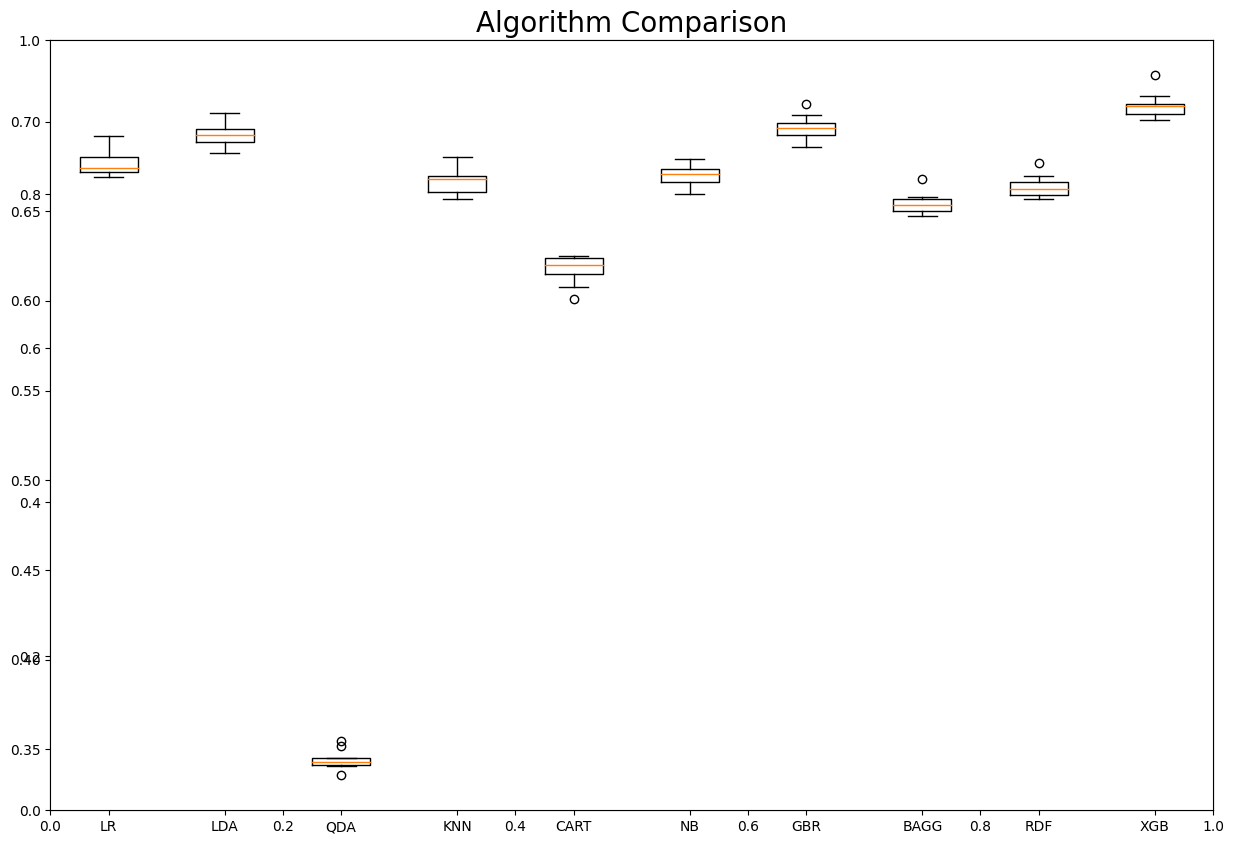

In [15]:
comparacion_modelos(X,y)

In [19]:
%%time
clf_xgb = XGboost(df_train)

CPU times: total: 0 ns
Wall time: 6 ms


In [20]:
print ('Score del Modelo en Test: '+str(metrics.accuracy_score(df_test['delay'],  clf_xgb.predict(df_test.drop(columns=['delay','delay_15','min_diff'])))))

Score del Modelo en Test: 0.7029087497067793


In [21]:
#import pickle

#filename = 'finalized_model.sav'
#pickle.dump(clf_xgb, open(filename, 'wb'))

In [21]:
def evaluate_model(model, x_test, y_test):
    """
    The function objective is to evalute the model performance on test

    Parameters
    --------------------
        - model: Pre trained Model
        - x_test: Test Independent Feeatures to run predict
        - y_true: True Values of the Target Variable
    """
    from sklearn import metrics

    # We predict on the test data
    y_pred = model.predict(x_test)

    # Accuracy, Precision, Recall, F1-Score, and Kappa Score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Area under the curve ROC (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True,annot_kws={'fontsize': 15},fmt='g')
    plt.ylabel('Real',fontsize = 15)
    plt.xlabel('Prediccion',fontsize = 15)
    plt.title('Matriz de Confusión',fontsize = 15)
    plt.show()

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc}
    

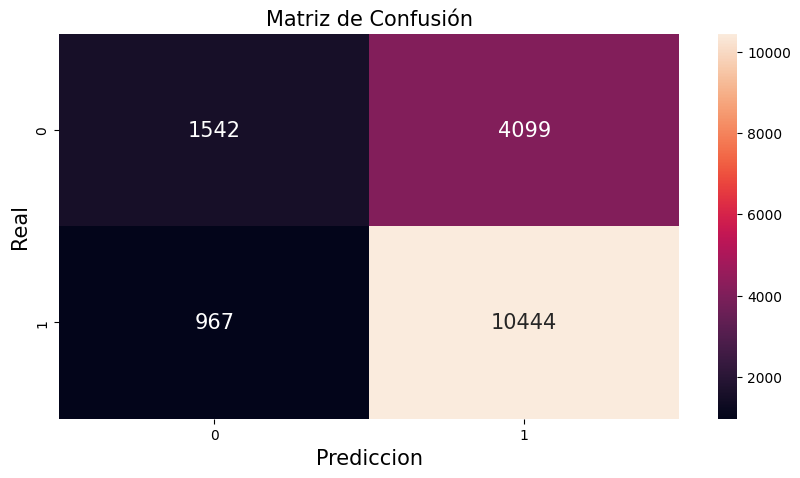

Accuracy: 0.7029087497067793
Precision: 0.7181461871690847
Recall: 0.9152572079572342
F1 Score: 0.8048085073591739
Cohens Kappa Score: 0.21941294617011486
Area Under Curve: 0.7099126571702468


In [22]:
# We evaluate the model
best_grid_eval = evaluate_model(clf_xgb, df_test.drop(columns=['delay','delay_15','min_diff']), df_test['delay'])

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])

In [23]:
# Parámetros óptimos
best_grid_xgb = clf_xgb.best_params_
clf_xgb.best_params_

{'xgb__learning_rate': 0.060000000000000005,
 'xgb__max_depth': 7,
 'xgb__n_estimators': 80,
 'xgb__reg_lambda': 0.0}

In [24]:
xgbc = xgb.XGBClassifier(learning_rate = best_grid_xgb['xgb__learning_rate'],
                        max_depth = best_grid_xgb['xgb__max_depth'],
                        n_estimators = best_grid_xgb['xgb__n_estimators'],
                        reg_lambda = best_grid_xgb['xgb__reg_lambda'])

In [25]:
# Hacemos un fit
xgbc.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.060000000000000005,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

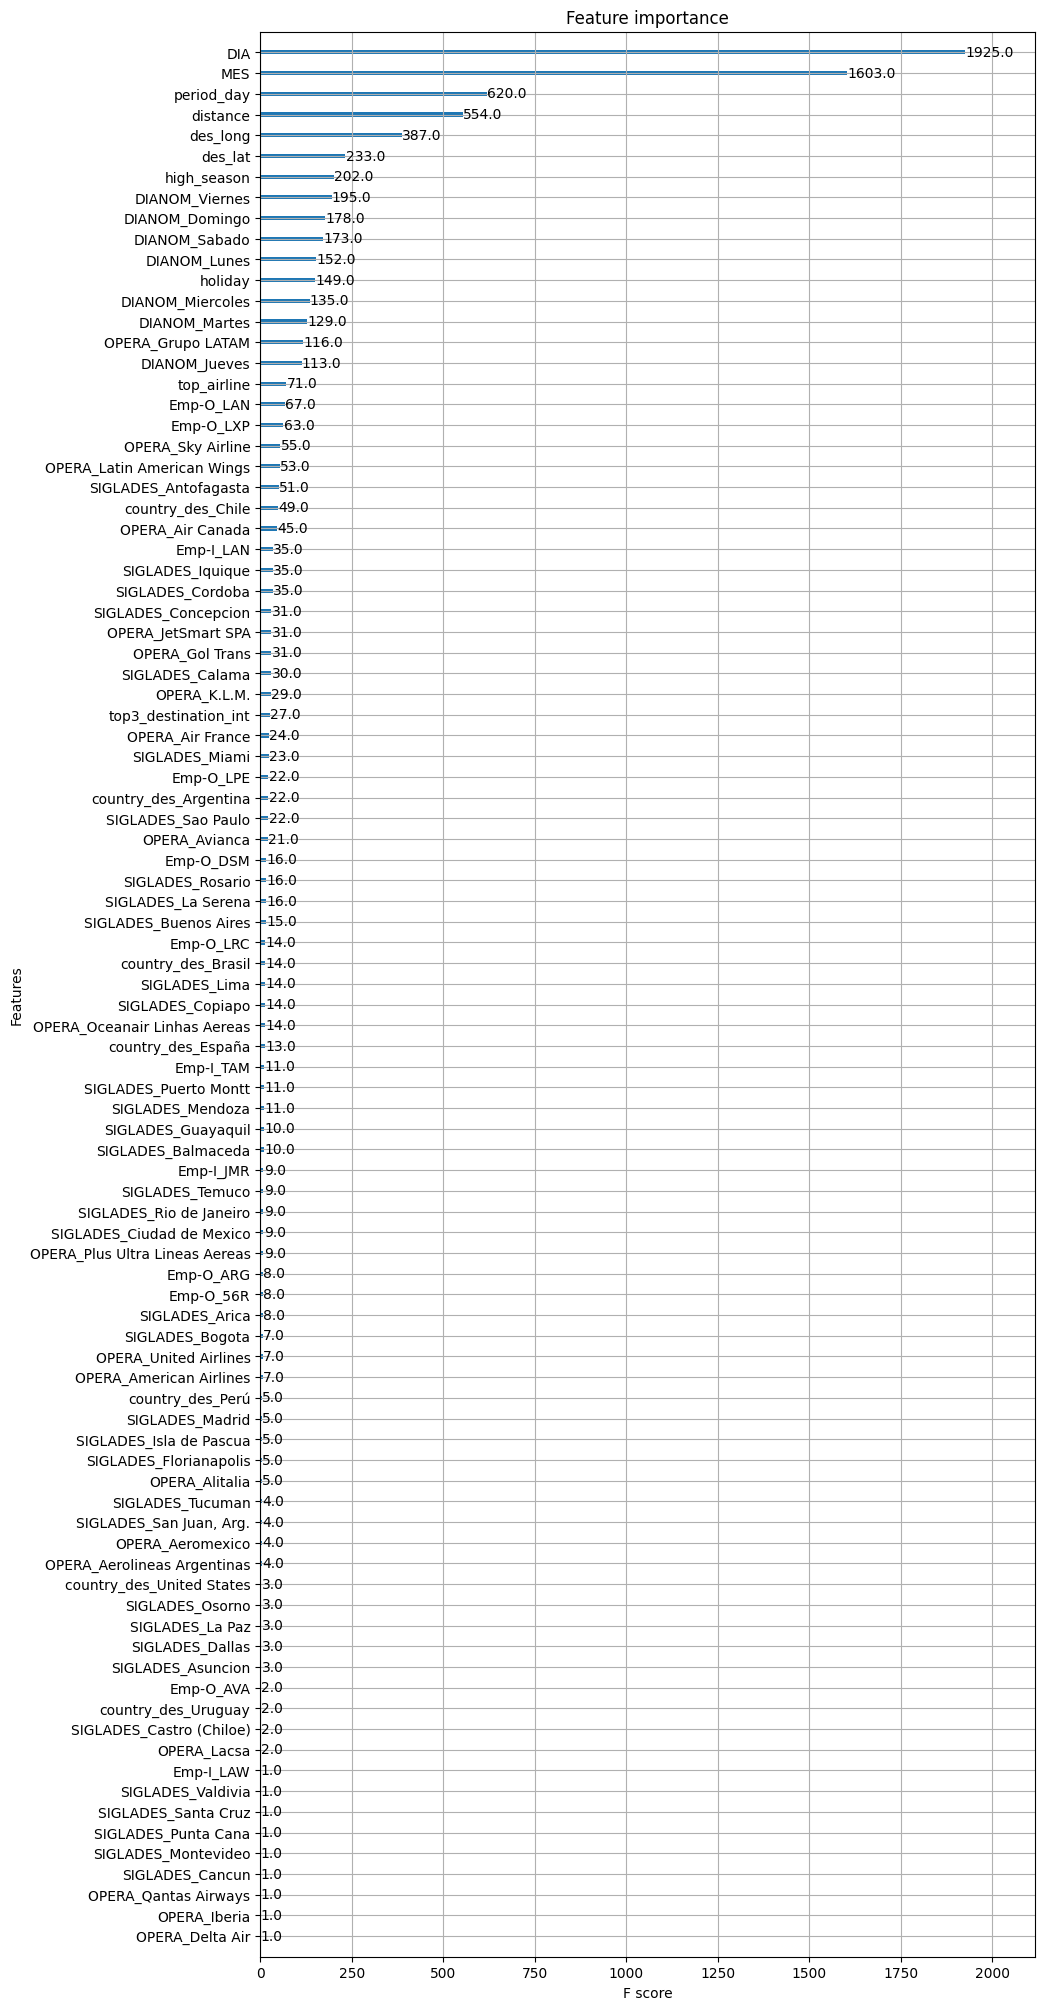

In [26]:
# Feature Importance
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 25))
xgb.plot_importance(xgbc,ax=ax);